In [1]:
import numpy as np
import matplotlib.pyplot as pyplot

from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as m

In [2]:
data_path = './data/flat_data.npy'
data_path = './data/flat_data_extra.npy'

data = np.load(data_path)


X = data[:,2:]
Y = data[:, 1]

In [3]:
# normalize data
X = preprocessing.normalize(X, norm='l2')

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state=1, stratify=Y)

# train SVM 
clf = svm.SVC(probability=True, gamma='auto')
clf.fit(train_X, train_Y)

# score training set
train_acc = clf.score(train_X, train_Y)
print ('training accuracy: {}'.format(train_acc))

# score test set
test_acc = clf.score(test_X, test_Y)
print ('validation accuracy: {}'.format(test_acc))

# evaluate metrics
predict_Y = clf.predict_proba(test_X)
yhat = clf.predict(test_X)
probs = predict_Y[:,1]
precision, recall, thresholds = m.precision_recall_curve(test_Y, probs)

training accuracy: 0.6911595866819747
validation accuracy: 0.6898395721925134


ROC_AUC: 0.901


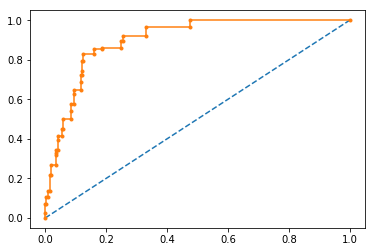

f1=0.000 auc=0.767 ap=0.774


c:\users\michaelsmith\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


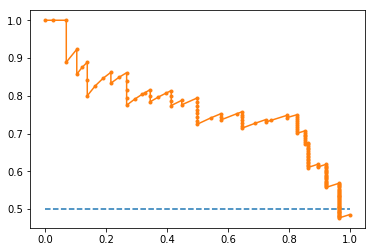

In [4]:
# calculate AUC
roc = m.roc_auc_score(test_Y, probs)
print('ROC_AUC: %.3f' % roc)
# calculate roc curve
fpr, tpr, thresholds = m.roc_curve(test_Y, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()



# calculate F1 score
f1 = m.f1_score(test_Y, yhat)
# calculate precision-recall AUC
auc = m.auc(recall, precision)
# calculate average precision score
ap = m.average_precision_score(test_Y, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()